In [2]:
#######################
# standard code block #
#######################

% pylab inline
# see https://ipython.readthedocs.io/en/stable/interactive/magics.html

%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


# Introduction to Pandas

## From the Pandas Documentation:

Here are just a few of the things that pandas does well:

- Easy handling of **missing data** (represented as NaN) in floating point as well as non-floating point data
- Size mutability: columns can be **inserted and deleted** from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
- Powerful, flexible **group by** functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
- Make it **easy to convert** ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
- Intelligent **label-based slicing**, **fancy indexing**, and **subsetting** of large data sets
- Intuitive **merging** and **joining** data sets
- Flexible **reshaping** and **pivoting** of data sets
- **Hierarchical labeling** of axes (possible to have multiple labels per tick)
- **Robust IO tools** for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
- **Time series**-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

### 10 Minutes Intro to Pandas ###

Pandas has an official 10 minute intro.

http://pandas.pydata.org/pandas-docs/stable/10min.html

## Set Up Pandas Default Parameters

In [3]:
# imports a library 'pandas', names it as 'pd'
# this is a common convention
import pandas as pd

In [4]:
# if you run into trouble, it's often helpful to know which version you're on
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)

Pandas version: 0.25.1
Numpy version: 1.17.2


In [5]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

## Data Structures

### 1. Series

One Dimensional Array / Vector of Values (Think these as your data columns).  One important aspect of them is that they carry an "index" (which you can think of as a row indicator).

### 2. DataFrames

Think of DataFrame as a Table with Columns.  This is the workhorse of everything you will do with data analysis.  Learning Pandas and its functions can be challenging, but stick with it and ask questions.  Structurally, a DataFrame can be thought of as a collection of Series objects with the same index.

### 3. [Panel Data](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Panel.html)

Three Dimensional Arrays  (Mentioned for reference, but we will not get much into these)

## So, What is a Pandas DataFrame?

In [6]:
pd.Series?

Init signature: pd.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
Docstring:     
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, *, **) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series.

    .. versionchanged :: 0.23.0
       If data is a dict, argument order is maintained for Python 3.6
       and later.

index : array-like or Index (1d)
    Values must be hashable and have the s

In [7]:
## Make a Series
s = pd.Series([1, 3, 5, np.nan, 6, 8])

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [8]:
pd.DataFrame?

Init signature: pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
Docstring:     
Two-dimensional size-mutable, potentially heterogeneous tabular data
structure with labeled axes (rows and columns). Arithmetic operations
align on both row and column labels. Can be thought of as a dict-like
container for Series objects. The primary pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, or list-like objects

    .. versionchanged :: 0.23.0
       If data is a dict, column order follows insertion-order for
       Python 3.6 and later.

    .. versionchanged :: 0.25.0
       If data is a list of dicts, column order follows insertion-order
       Python 3.6 and later.

index : Index or array-like
    Index to use for resulting frame. Will default to RangeIndex if
    no indexing information part of input data and no index provided
columns : Index or array-l

In [9]:
## Make a dataframe from a numpy array
df1 = pd.DataFrame(np.random.randn(6, 4), columns=list('ABCD'))
df1

,A,B,C,D
0,-0.138,-1.562,0.332,-0.111
1,-0.619,1.578,-0.730,-0.268
2,-0.211,-0.460,-1.151,-1.348
3,-1.822,-1.504,-1.438,0.232
4,-0.841,-1.150,-1.582,0.881
5,0.790,-0.667,0.048,-0.517


In [10]:
## Make a dataframe from a dictionary
df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'
})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


## Load a Data Set

### "Census Income" Dataset

http://archive.ics.uci.edu/ml/  
pandas can load a lot more than csvs, this tutorial shows how pandas can read excel, sql, and even copy and paste...
http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/

In [24]:
# download the data and name the columns
cols = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
    'capital_gain', 'capital_loss', 'hours_per_week', 'country_of_origin',
    'income'
]

df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    names=cols)

### Q: What's happening in the above cell?

In [15]:
df.shape

(32561, 15)

## Viewing Data

* .info() 
* .head()
* .tail()
* .columns
* .values
* .dtype

### info

Displays the Columns, Types, Rows and the memory used by the dataframe

In [16]:
# we can see there are no null values
# columns with numerical values are type int64, no need to set data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                  32561 non-null int64
workclass            32561 non-null object
fnlwgt               32561 non-null int64
education            32561 non-null object
education_num        32561 non-null int64
marital_status       32561 non-null object
occupation           32561 non-null object
relationship         32561 non-null object
ethnicity            32561 non-null object
gender               32561 non-null object
capital_gain         32561 non-null int64
capital_loss         32561 non-null int64
hours_per_week       32561 non-null int64
country_of_origin    32561 non-null object
income               32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### head

Displays the first few rows in the dataframe

In [ ]:
# to view the first 5 or specify with ex: .head(10)
df.head(10)

### tail

Displays the last few rows in the dataframe

In [ ]:
df.tail()

### sample

Displays a sample of rows in the dataframe

In [19]:
# head and tail are good.  But sometimes we want to randomly sample data
df.sample(5, random_state=42)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
7827,29,Self-emp-not-inc,189346,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States,<=50K


### Q: What do you expect to happen when you re-run the cell?

What actually happens? Why?

Stays the same as the seed is set at 42

### Columns

Returns a list of columns in the dataframe

In [25]:
# view all columns of the dataframe
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country_of_origin',
       'income'],
      dtype='object')

### Column Types

Returns the type of each column

In [20]:
df.dtypes

age                   int64
workclass            object
fnlwgt                int64
education            object
education_num         int64
marital_status       object
occupation           object
relationship         object
ethnicity            object
gender               object
capital_gain          int64
capital_loss          int64
hours_per_week        int64
country_of_origin    object
income               object
dtype: object

## Rename Columns

In [22]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [26]:
# replace a column name
df.rename(columns={'country_of_origin': 'native_country'}, inplace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Q: What does `in_place` do above?

## Descriptives 

* .describe()
* .value_counts()
* .mean()
* .unique()

### describe

Displays summary statistic for each numerical column

In [ ]:
df.describe()

### value_counts

Counts the number of occurrences of each categorical value for the column

In [ ]:
df['education']

In [27]:
type(df.education)

pandas.core.series.Series

In [28]:
df.education.value_counts()

## Also works for numeric columns - treating the individual values as factors

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [30]:
type(df.education.value_counts())

pandas.core.series.Series

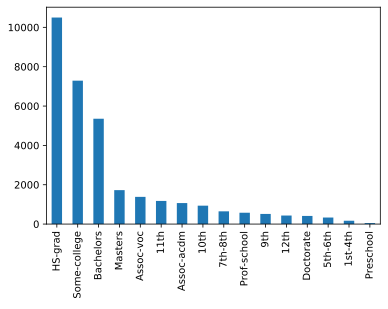

In [36]:
df.education.value_counts().plot(kind = 'bar')

In [ ]:
df.hours_per_week.mean()

# Can also do:
df['hours_per_week'].mean()

### Q: What do you think we will get if we ask for the `type` of `df.hours_per_week` ?


In [37]:
type(df.hours_per_week)

pandas.core.series.Series

### Unique

Returns the unique values for the column

In [38]:
# there's a space before each string in this data
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [39]:
# looks like it's in every object column
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [40]:
df["education"] = df.education.str.strip()

In [41]:
# Hurray We removed the leading space
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [42]:
df.gender.unique()

array([' Male', ' Female'], dtype=object)

In [43]:
# Remove leading space in values
df["gender"] = df.gender.str.strip()

In [44]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

## Selecting Rows and Columns 

### .loc 

* Selects row and columns by Names
* **by label**             `.loc[]`

### .iloc

* Selects row and columns by Index Position
* **by integer position**  `.iloc[]`

http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [ ]:
# select a row
df.iloc[3]

In [ ]:
df.iloc[0:3]

## Note: I got 3 rows returned, similar to the indexing that applies to Python lists

In [45]:
# select a range of rows
df.iloc[10:15]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K


In [46]:
# last 2 rows
df.iloc[-2:]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [47]:
# selecting every other row in columns 3-5
df.iloc[::2, 2:5].head()

,fnlwgt,education,education_num
0,77516,Bachelors,13
2,215646,HS-grad,9
4,338409,Bachelors,13
6,160187,9th,5
8,45781,Masters,14


In [48]:
# select a row
df.loc[0:3]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


### Q: Why did I get 4 rows above here instead of 3?





Integers vs. labels!

In [49]:
(df.loc[0:2, 'age'])

0    39
1    50
2    38
Name: age, dtype: int64

In [50]:
df.iloc[0:2, 2:6]

,fnlwgt,education,education_num,marital_status
0,77516,Bachelors,13,Never-married
1,83311,Bachelors,13,Married-civ-spouse


## Filtering

In [ ]:
(df.age > 50)

In [ ]:
asd = df[df.age > 50].head(5)

In [ ]:
# Filter for only certain Columns
df.loc[df.age > 50, ['age', 'education', 'occupation', 'gender', 'income']]

# What happens if I try to do the same with df.iloc instead of df.loc?


In [ ]:
df[df.age > 50].head(4)

## Now Filter on Gender

In [ ]:
df.gender == 'Male'

In [ ]:
df.loc[df.gender == 'Male', ]

## Now Filter on Gender and Age Between 30 and 40

In [ ]:
(df.gender == 'Male') & (df.age >= 30) & (df.age <= 40)

In [ ]:
(df.age >= 30) & (df.gender == 'Male')

df.loc[(df.age >= 30) & (df.gender == 'Male') & (df.age <= 40), :]

## Find Nulls

In [ ]:
# as we saw with df.info() there are no nulls...
# but if there were this would find the rows where age is null
df[df.age.isnull()]

## Fill Nulls

In [51]:
null_df = pd.DataFrame([1, 2, 4, np.nan], columns=['column1'])

In [52]:
null_df

,column1
0,1.0
1,2.0
2,4.0
3,NaN


In [53]:
# you can also fill nulls with a value or string
null_df.column1.fillna(1000)

0       1.0
1       2.0
2       4.0
3    1000.0
Name: column1, dtype: float64

In [54]:
# fillna does not do it inplace unless you specify
null_df

,column1
0,1.0
1,2.0
2,4.0
3,NaN


In [56]:
# you can also fill null with the median or mean value of the column
null_df.fillna(null_df.column1.median(), inplace=True)
null_df

,column1
0,1.0
1,2.0
2,4.0
3,2.0


In [57]:
null_df.fillna('random_string')

,column1
0,1.0
1,2.0
2,4.0
3,2.0


## Drop Nulls

In [58]:
null_df = pd.DataFrame([1, 2, 4, np.nan], columns=['column1'])
null_df

,column1
0,1.0
1,2.0
2,4.0
3,NaN


In [59]:
null_df.dropna(how = 'any')

,column1
0,1.0
1,2.0
2,4.0


In [60]:
# .isnull() and .notnull() do opposite things
null_df.isnull()

,column1
0,False
1,False
2,False
3,True


In [61]:
null_df.notnull()

,column1
0,True
1,True
2,True
3,False


## Groupby

In [ ]:
df.groupby('relationship').count()

In [ ]:
# How to groupby column and apply a function like sum, count, or mean
df.groupby(['education']).mean()

In [62]:
df.groupby([
    'education',
    'age',
])[['hours_per_week', 'capital_gain']].mean()

hours_per_week  capital_gain
education    age                              
10th         17           21.543       266.659
             18           27.895         0.000
             19           34.500         0.000
             20           39.400         0.000
             21           39.000       229.882
...                          ...           ...
Some-college 81           13.000         0.000
             82           11.500         0.000
             84           35.000         0.000
             88           40.000         0.000
             90           32.833         0.000

[965 rows x 2 columns]

In [ ]:
# To groupby multiple columns with multiple functions attached
df.groupby(['income', 'native_country']).age.agg(['count', 'mean'])
# grouped in order of which column is listed first

In [ ]:
df.columns

In [ ]:
# can use the aggs function to aggregate columns separately
gb = df.groupby(['income', 'native_country'])
gb_aggs = gb.agg({'age': 'mean', 'capital_gain': 'sum'})
gb_aggs.sample(1)

In [63]:
# combine groupby with boolean
df[df.native_country == ' United-States'].groupby(
    ['education']).hours_per_week.mean()

education
10th            36.915
11th            33.682
12th            34.951
1st-4th         32.913
5th-6th         36.979
7th-8th         39.060
9th             38.035
Assoc-acdm      40.657
Assoc-voc       41.633
Bachelors       42.709
Doctorate       47.409
HS-grad         40.596
Masters         44.169
Preschool       28.118
Prof-school     47.484
Some-college    38.862
Name: hours_per_week, dtype: float64

## Sort
* ### sort_index() to sort by index
* ### sort_values() to sort by values

In [64]:
# groupby income and country and then sort by their mean age within each data block
df_grouped = df.groupby(['income', 'native_country']).mean().sort_values(
    'age', ascending=True)
df_grouped

# Note: In this example, the groupby, mean, and sort functions are stringed together in one line
# in the next example, we will show a different syntax so that you could write them on separate
# lines to make the code a little easier to read

age      fnlwgt  education_num  capital_gain  \
income native_country                                                         
 <=50K  Taiwan              29.323  181981.290         12.548        71.032   
 >50K   Dominican-Republic  30.500  220226.000          9.000     49999.500   
        Hong                31.500  294478.833         13.833         0.000   
 <=50K  Holand-Netherlands  32.000   27882.000         10.000         0.000   
        Guatemala           32.262  266016.016          5.951       116.148   
...                            ...         ...            ...           ...   
 >50K   Italy               50.360  185383.360         10.960      1253.040   
        Poland              50.583  179314.167         11.083      2743.083   
        Scotland            52.667  208306.667         10.667      1726.000   
        Columbia            53.500  283410.500         15.500         0.000   
        Hungary             57.333  172137.333         11.000      1726.000   

                            capital_loss  hours_per_week  
income native_country                                     
 <=50K  Taiwan                    51.677          33.774  
 >50K   Dominican-Republic         0.000          47.000  
        Hong                     329.500          45.000  
 <=50K  Holand-Netherlands      2205.000          40.000  
        Guatemala                 26.131          39.361  
...                                  ...             ...  
 >50K   Italy                     79.080          45.400  
        Poland                     0.000          39.000  
        Scotland                   0.000          46.667  
        Columbia                   0.000          50.000  
        Hungary                    0.000          50.000  

[82 rows x 6 columns]

In [65]:
# We want to group people by their income and country
# Then sort them by their income ASCE, and then sort by average age within that group DESC 
(df
 .groupby(['income','native_country'])
 .mean()
 .reset_index()
 .sort_values(['income','age'], ascending=[True,False])
)

# Note: In this example, we sort by the SAME column which we grouped by earlier 
# (eg. we first groupby 'income' and then sort by 'income')
# In this case, we must use .reset_index() to re-index the groupby objects, because the 'income' 
# column no longer exists after the groupby and hence cannot be sorted directly

,income,native_country,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
5,<=50K,Cuba,47.286,243906.229,9.043,136.986,19.714,37.986
18,<=50K,Hungary,47.000,182993.800,10.700,413.800,166.800,31.300
12,<=50K,Greece,44.667,151661.286,9.190,347.762,202.429,41.810
22,<=50K,Italy,44.375,179759.375,7.750,277.375,0.000,39.625
3,<=50K,China,41.800,175689.182,10.309,103.891,94.418,37.382
...,...,...,...,...,...,...,...,...
68,>50K,Nicaragua,34.000,399953.500,9.500,0.000,924.000,37.500
69,>50K,Peru,33.500,314562.500,11.500,0.000,924.000,40.000
77,>50K,Thailand,32.667,199784.000,12.667,0.000,0.000,58.333
58,>50K,Hong,31.500,294478.833,13.833,0.000,329.500,45.000
